In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from keras import ops

2024-07-08 15:55:47.014928: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 15:55:47.015023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 15:55:47.139042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# height, width, channels
input_shape = (224,224)

(282, 230, 3)
21 32 189 224
cropped image shape (224, 189, 3)
(224, 224, 3)
(224, 224, 3)


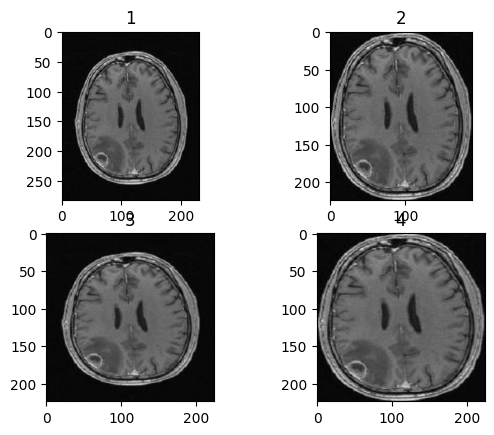

In [4]:
import cv2, os
dir_no = '/kaggle/input/brain-tumor-detection/no'
dir_yes = '/kaggle/input/brain-tumor-detection/yes'
y = []
X_train = []
for i in os.listdir(dir_no):
    y.append(0)
    path_to_image = dir_no + '/' + i
    #print(path_to_image)
    #break
    image = cv2.imread(path_to_image)
    print(image.shape)
    plt.subplot(2,2,1)
    plt.title("1")
    plt.imshow(image)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise (optional but recommended)
    gray_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(gray_blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it corresponds to the MRI scan)
    largest_contour = max(contours, key=cv2.contourArea)

    # Find the bounding box coordinates
    x1, y1, w, h = cv2.boundingRect(largest_contour)
    print(x1,y1,w,h)

    # Crop the original color image using the bounding box coordinates
    cropped_image = image[y1:y1+h, x1:x1+w]
    print("cropped image shape", cropped_image.shape)
    plt.subplot(2,2,2)
    plt.title("2")
    plt.imshow(cropped_image)
    # return the numpy array as h,w,c
    image = cv2.resize(image, input_shape)
    print(image.shape)
    plt.subplot(2,2,3)
    plt.title("3")
    plt.imshow(image)
    cropped_image = cv2.resize(cropped_image, input_shape)
    print(cropped_image.shape)
    plt.subplot(2,2,4)
    plt.title("4")
    plt.imshow(cropped_image)
    #print(image)
    break
    X_train.append(image)

for i in os.listdir(dir_yes):
    y.append(1)
    path_to_image = dir_yes + '/' + i
    #print(path_to_image)
    #break
    image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
    # return the numpy array as h,w,c
    
    break
    X_train.append(image)

In [5]:
import cv2, os
dir_no = '/kaggle/input/brain-tumor-detection/no'
dir_yes = '/kaggle/input/brain-tumor-detection/yes'
y = []
X_train = []
for i in os.listdir(dir_no):
    y.append(0)
    path_to_image = dir_no + '/' + i
    #print(path_to_image)
    #break
    image = cv2.imread(path_to_image)
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise (optional but recommended)
    gray_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(gray_blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it corresponds to the MRI scan)
    largest_contour = max(contours, key=cv2.contourArea)

    # Find the bounding box coordinates
    x1, y1, w, h = cv2.boundingRect(largest_contour)
    #print(x1,y1,w,h)

    # Crop the original color image using the bounding box coordinates
    cropped_image = image[y1:y1+h, x1:x1+w]
    
    cropped_image = cv2.resize(cropped_image, input_shape)
    
    X_train.append(cropped_image)
    

for i in os.listdir(dir_yes):
    y.append(1)
    path_to_image = dir_yes + '/' + i
    image = cv2.imread(path_to_image)
    # return the numpy array as h,w,c
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise (optional but recommended)
    gray_blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(gray_blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it corresponds to the MRI scan)
    largest_contour = max(contours, key=cv2.contourArea)

    # Find the bounding box coordinates
    x1, y1, w, h = cv2.boundingRect(largest_contour)
    #print(x1,y1,w,h)

    # Crop the original color image using the bounding box coordinates
    cropped_image = image[y1:y1+h, x1:x1+w]
    
    cropped_image = cv2.resize(cropped_image, input_shape)
    X_train.append(cropped_image)
    


In [6]:
print(len(X_train))
print(len(y))
X_train = np.array(X_train)
y = np.array(y)



print("shape of features are {}".format(X_train.shape))
print("shape of target are {}".format(y.shape))

num_classes = 2
input_shape = X_train[0].shape
#print(input_shape)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, y, random_state=42, test_size=0.1)
print("shape of training sample are {}, {}".format(x_train.shape, y_train.shape))
print("shape of testing sample are {}, {}".format(x_test.shape, y_test.shape))

3000
3000
shape of features are (3000, 224, 224, 3)
shape of target are (3000,)
shape of training sample are (2700, 224, 224, 3), (2700,)
shape of testing sample are (300, 224, 224, 3), (300,)


In [7]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 100  # For real training, use num_epochs=100. 10 is a test value
image_size = 224  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 2
mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [9]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [10]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

In [11]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
    def build(self):
        #print("it is a automatic paramter that is passed to the ", input_shape)
        self.class_token = self.add_weight(
            shape = (1, 1, projection_dim),
            initializer="glorot_uniform",
            trainable=True,
            dtype="float32",
            name="class_token_build",
        )
    
    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        print("projected_patches_shape", projected_patches)
        
        

        batch_size = ops.shape(projected_patches)[0]

        cls = ops.broadcast_to(self.class_token, [batch_size, 1, ops.shape(projected_patches)[-1]])
        cls = ops.cast(cls, dtype=projected_patches.dtype)
        print("class token shape ", cls.shape)

        cls = ops.concatenate([cls, projected_patches], axis=1)
        print("class token + linear porjection patches shape ", cls.shape)

        encoded = cls + self.position_embedding(positions)
        print("(class token + linear projection patches) + position embeddings shape", encoded.shape)
        
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [12]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape, batch_size=batch_size)
    print("inputs shape", inputs.shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    print("augmented shape", augmented.shape)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    print("patches shape", patches.shape)
    
    encoded_patches = PatchEncoder(num_patches+1, projection_dim)(patches)
    print("encoded_patches shape", encoded_patches.shape)
    
    
    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        #print("layer of the transformer")
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])
    #print("after layer of the transformer")

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    #print("before the mlp layer")
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(1, activation="sigmoid")(features)
    #print("before the model")
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    #print("before returning the model")
    return model

inputs shape (32, 224, 224, 3)
augmented shape (32, 224, 224, 3)
patches shape (32, 196, 768)
projected_patches_shape Tensor("dense_1/Add:0", shape=(32, 196, 64), dtype=float32)
class token shape  (32, 1, 64)
class token + linear porjection patches shape  (32, 197, 64)
(class token + linear projection patches) + position embeddings shape (32, 197, 64)
encoded_patches shape (32, 197, 64)
Epoch 1/100
projected_patches_shape Tensor("functional_2_1/patch_encoder_1/dense_1/Add:0", shape=(None, 196, 64), dtype=float32)
class token shape  (None, 1, 64)
class token + linear porjection patches shape  (None, 197, 64)
(class token + linear projection patches) + position embeddings shape (None, 197, 64)


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


projected_patches_shape Tensor("functional_2_1/patch_encoder_1/dense_1/Add:0", shape=(None, 196, 64), dtype=float32)
class token shape  (None, 1, 64)
class token + linear porjection patches shape  (None, 197, 64)
(class token + linear projection patches) + position embeddings shape (None, 197, 64)
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5444 - loss: 2.6825projected_patches_shape Tensor("functional_2_1/patch_encoder_1/dense_1/Add:0", shape=(None, 196, 64), dtype=float32)
class token shape  (None, 1, 64)
class token + linear porjection patches shape  (None, 197, 64)
(class token + linear projection patches) + position embeddings shape (None, 197, 64)
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.5445 - loss: 2.6751 - val_accuracy: 0.6185 - val_loss: 0.6987
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6258 - loss: 0.7900 - val_accuracy: 0.6556 - val_loss: 0.6482
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6149 - loss: 0.700

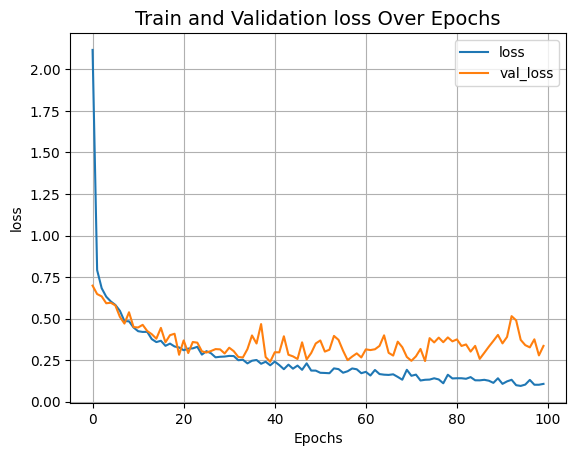

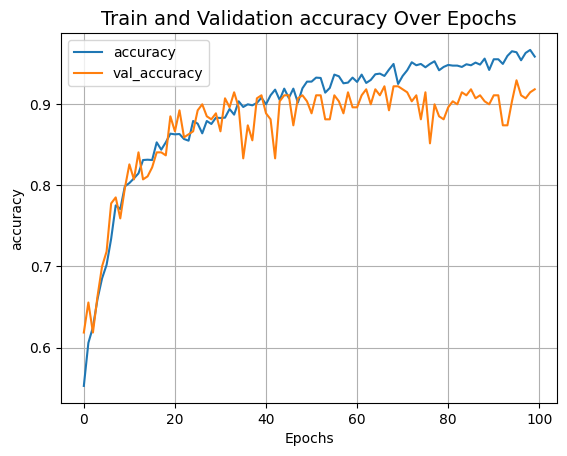

In [13]:
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.BinaryAccuracy(name="accuracy"),
            #keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )
    
    model.load_weights(checkpoint_filepath)
    #_, accuracy, top_5_accuracy = model.evaluate(x_test, y_test, batch_size=256)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=256)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    #print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_history("loss")
plot_history("accuracy")
#plot_history("top-5-accuracy")
